## 1.1.4. Elastic-Net

Elastic-Net은 Lasso와 Ridge를 결합한 방법입니다.<br><br>
Lasso 는 서로 상관관계가 높은 피처들의 경우에 중요한 피처만을 선택하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강합니다.<br><br>
이러한 성향으로 인해 alpha값에 따라 회귀 계수의 값이 급격히 변동할 수도 있는데 Elastic-Net은 이를 완화하기 위해 Ridge를 Lasso에 추가한 것입니다.<br><br>
단점은 Lasso와 Ridge가 결합된 규제로 인해 수행시간이 상대적으로 오래걸린다는 것입니다.

$ Lasso = \min_{w}||X_w - y||^{2}_{2} + \alpha||w||_1 $
<br><br><br>
$ Ridge =  \min_{w}||X_w - y||_{2}^{2} + \alpha||w||_{2}^{2} $
<br><br><br>
$ ElasticNet =  \min_{w}||X_w - y||_{2}^{2} + \alpha_{1}||w||_1 + \alpha_{2}||w||_{2}^{2} $

scikit-learn의 ElasticNet Library 에는 $alpha$, $l1\_ ratio$ 두가지 파라미터가 있습니다.<br><br>
$ alpha = \alpha_{1} + \alpha_{2}$<br><br>
$ l1\_ ratio = \frac{\alpha_{1}}{\alpha_{1} + \alpha_{2}} $ <br><br>
$ l1\_ ratio $ 가 0 이면 $\alpha_{1}$가 0이므로 Ridge와 동일합니다. <br><br>
$ l1\_ ratio $ 가 1 이면 $\alpha_{2}$가 0이므로 Lasso와 동일합니다. <br><br>
다시 말하면 $ l1\_ ratio $ 가 0에 가까우면 Ridge와 비슷한 특성을 갖고 1에 가까우면 Lasso와 비슷한 특성을 갖습니다.

### Example) Boston dataset

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston, load_diabetes, load_iris, load_linnerud, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from statsmodels.datasets.longley import load_pandas
%matplotlib inline

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
print('데이터 세트 크기:', bostonDF.shape)

bostonDF.head()

데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- CRIM : 지역별 범죄 발생률<br><br>
- ZN : 25,000 평방 피트를 초과하는 거주 지역의 비율<br><br>
- INDUS : 비상업 지역 넓이 비율<br><br>
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우 1, 아니면 0)<br><br>
- NOX : 일산화질소 농도<br><br>
- RM : 거주할 수 있는 방 개수<br><br>
- AGE : 1940년 이전에 건축된 소유 주택의 비율<br><br>
- DIS : 5개 주요 고용센터까지의 가중 거리<br><br>
- RAD : 고속도로 접근 용이도<br><br>
- TAX : 10,000 달러당 재산세율<br><br>
- PTRATIO : 지역의 교사와 학생 수 비율<br><br>
- B : 지역의 흑인 거주 비율<br><br>
- LSTAT : 하위 계층의 비율<br><br>
- target : 본인 소유의 주택 가격(중앙값)<br><br>

In [3]:
# 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'RTRATIO', 'LSTAT'
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
# X_data = data.drop(['PRICE', 'CRIM', 'CHAS', 'DIS', 'TAX', 'B'], axis = 1, inplace = False)

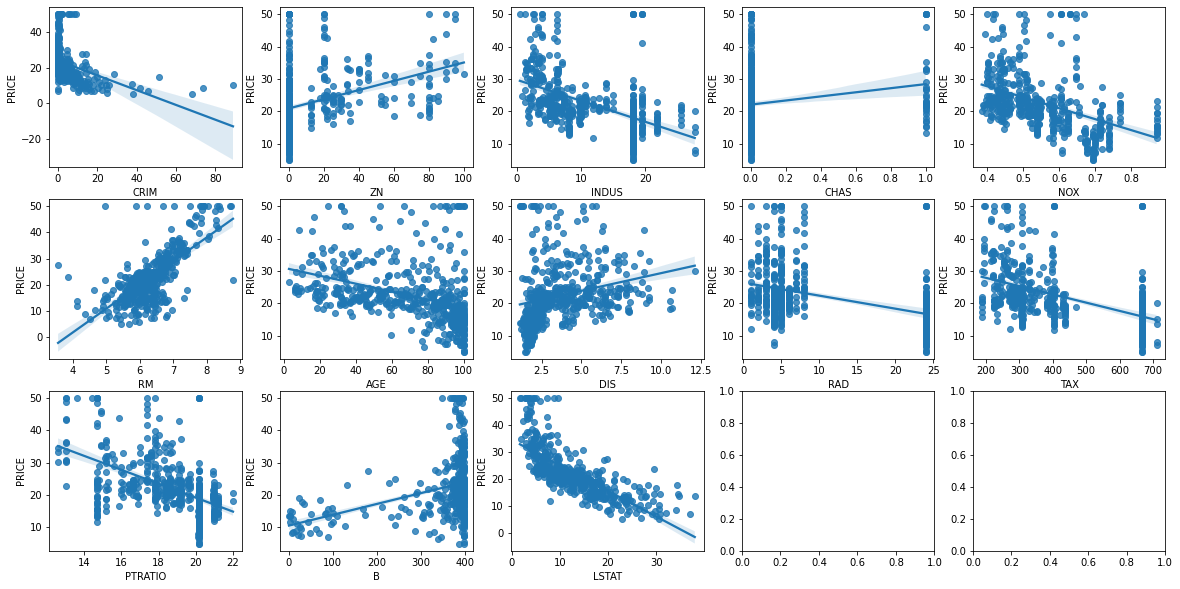

In [ ]:
fig, axs = plt.subplots(figsize=(20, 10), ncols=5, nrows=3)

lm_features = X_data

for i, feature in enumerate(lm_features):
    row = int(i/5)
    col = i%5

    sns.regplot(x=feature, y=y_target, data=X_data, ax=axs[row][col])

<AxesSubplot:>

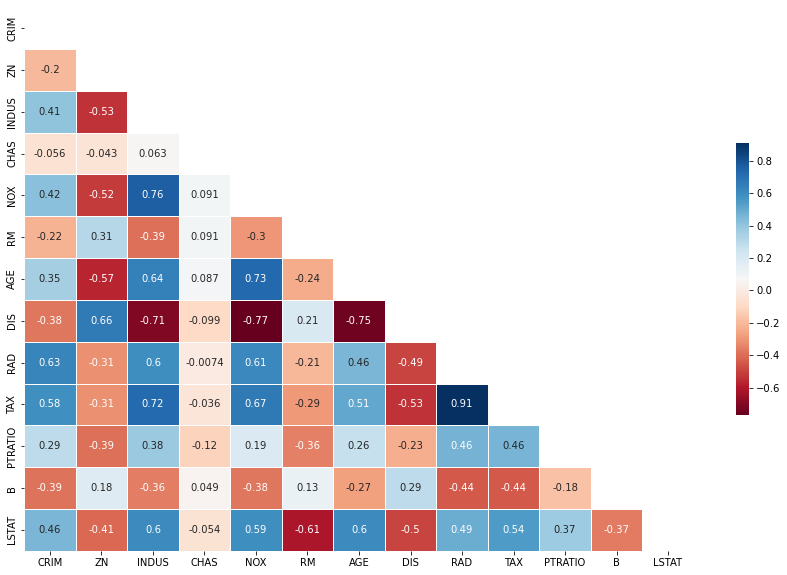

In [4]:
plt.figure(figsize=(15, 10))

mask = np.zeros_like(X_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(X_data.corr(), 
            annot=True, 
            mask = mask,
            # cmap='RdYlBu_r',
            cmap='RdBu',
            # cmap='Blues',
            linewidths=.5,
            cbar_kws={'shrink': .5})

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=34)

- LinearRegression

In [15]:
model = LinearRegression()

neg_mse_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))

print(f'5 폴드 세트의 평균 RMSE : {np.round(avg_rmse, 3)}')

model.fit(X_train, y_train)

coeff = pd.Series(data = model.coef_, index = X_train.columns)
print(coeff.sort_values(ascending=False))

model.score(X_test, y_test)

5 폴드 세트의 평균 RMSE : 5.041
RM          3.326002
CHAS        2.414213
RAD         0.305119
ZN          0.053649
INDUS       0.050883
AGE         0.009269
B           0.009202
TAX        -0.011420
CRIM       -0.108359
LSTAT      -0.580341
PTRATIO    -0.991036
DIS        -1.412270
NOX       -17.857303
dtype: float64


0.7433987333552776

In [16]:
alphas = [0, 0.1, 1, 10, 50, 100]
# alphas = [0.07, 0.1, 0.5, 1, 3, 10]
# alphas = [0, 0.05, 0.1, 0.2, 0.5, 1]

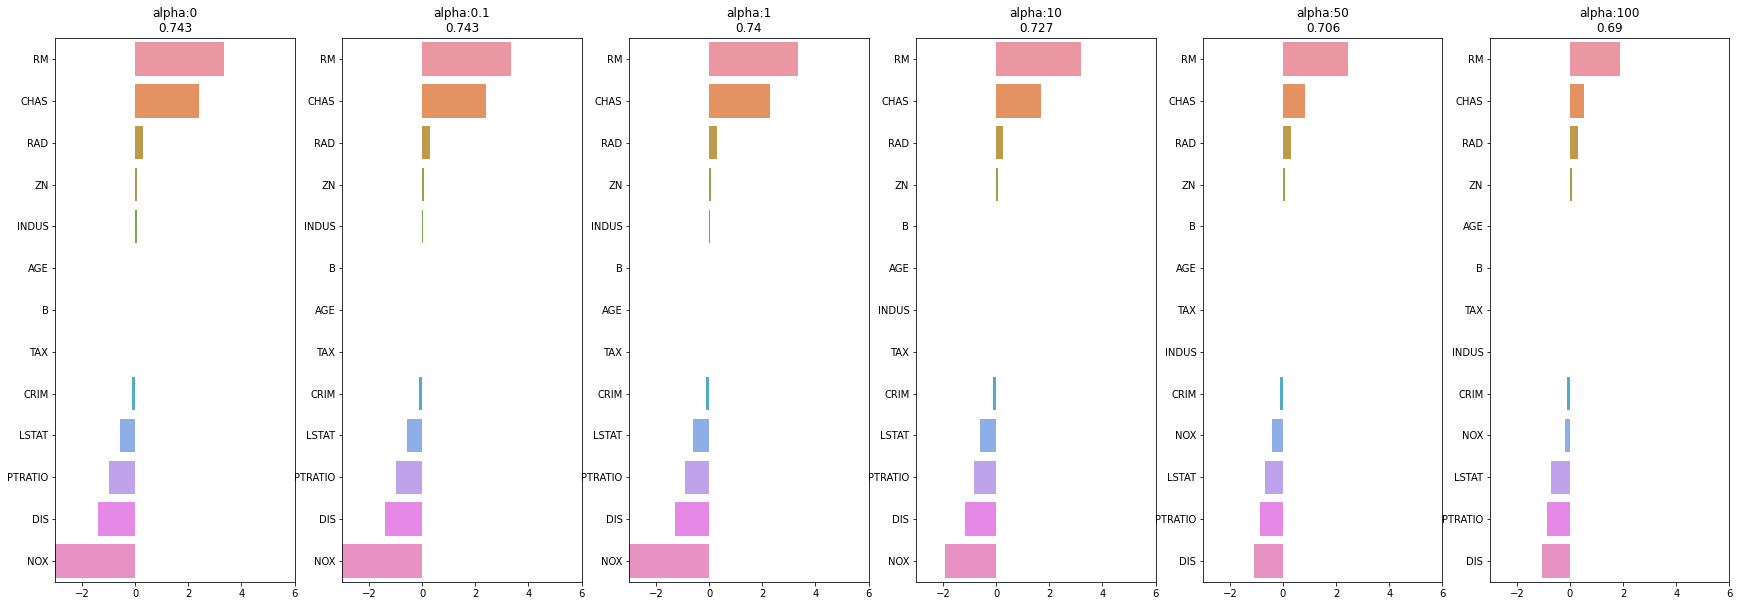

In [17]:
fig, axs = plt.subplots(figsize=(30, 10), nrows=1, ncols=6)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)

    coeff = pd.Series(data=ridge.coef_, index=X_train.columns)
    colname='alpha:' + str(alpha) + '\n' + str(np.round(ridge.score(X_test, y_test), 3))
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)

    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

In [18]:
alphas = [0.07, 0.1, 0.5, 0.7, 1, 3]

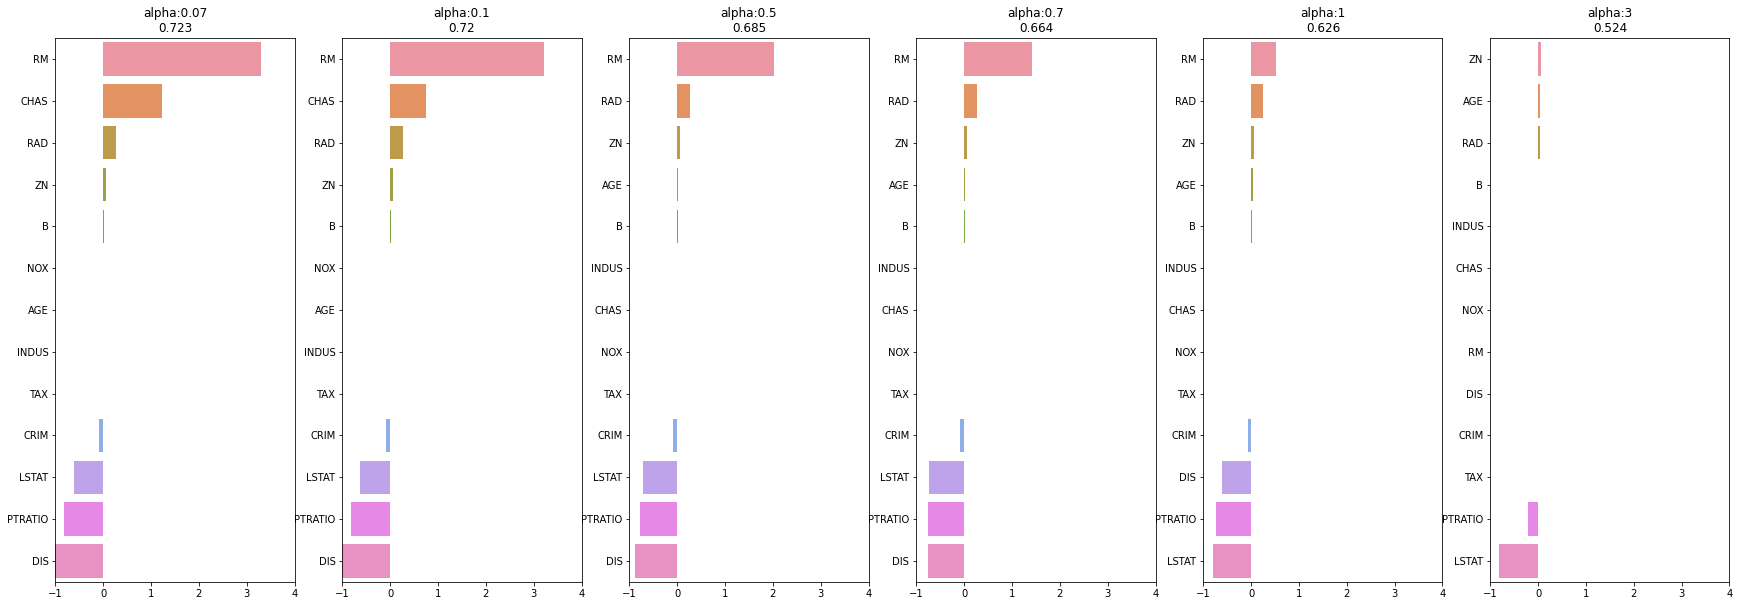

In [19]:
fig, axs = plt.subplots(figsize=(30, 10), nrows=1, ncols=6)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)

    coeff = pd.Series(data=lasso.coef_, index=X_train.columns)
    colname='alpha:' + str(alpha) + '\n' + str(np.round(lasso.score(X_test, y_test), 3))
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)

    axs[pos].set_title(colname)
    axs[pos].set_xlim(-1, 4)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

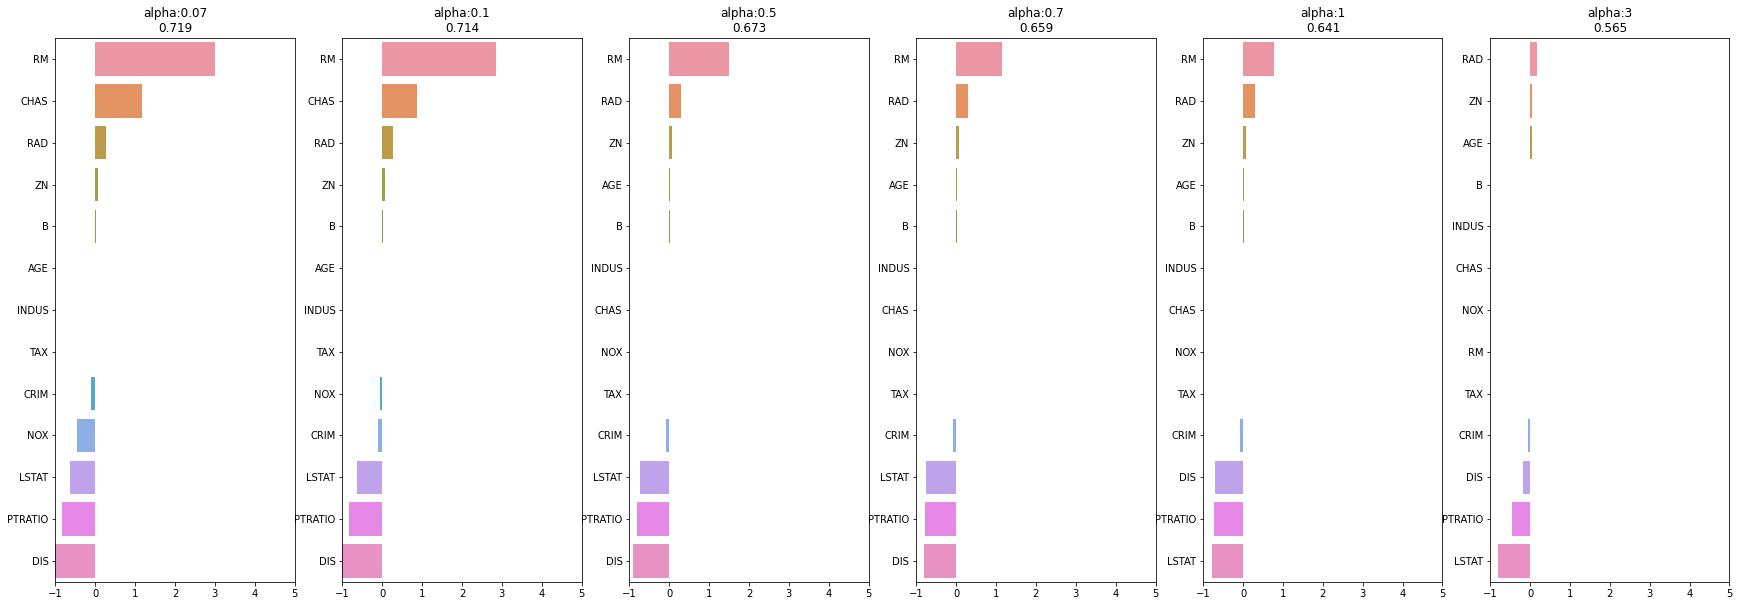

In [37]:
fig, axs = plt.subplots(figsize=(30, 10), nrows=1, ncols=6)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    elastic = ElasticNet(alpha = alpha, l1_ratio=0.5)
    elastic.fit(X_train, y_train)

    coeff = pd.Series(data=elastic.coef_, index=X_train.columns)
    colname='alpha:' + str(alpha) + '\n' + str(np.round(elastic.score(X_test, y_test), 3))
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)

    axs[pos].set_title(colname)
    axs[pos].set_xlim(-1, 5)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

- correlation

In [ ]:
# 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'RTRATIO', 'LSTAT'

- linear regression

In [58]:
model = LinearRegression()

# cross_val_score는 가장 높은 값을 반환하는데 mse는 작은 값이 좋은 값이므로 neg mse를 구하고 -를 붙여 mse로 만든다
# neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='r2', cv=5)

# avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
avg_rmse = np.mean(neg_mse_scores)

print(f'5 폴드 세트의 평균 RMSE : {np.round(avg_rmse, 3)}')

model.fit(X_data, y_target)

coeff = pd.Series(data = model.coef_, index = X_data.columns)
coeff.sort_values(ascending=False)

5 폴드 세트의 평균 RMSE : 0.353


RM          3.809865
CHAS        2.686734
RAD         0.306049
ZN          0.046420
INDUS       0.020559
B           0.009312
AGE         0.000692
TAX        -0.012335
CRIM       -0.108011
LSTAT      -0.524758
PTRATIO    -0.952747
DIS        -1.475567
NOX       -17.766611
dtype: float64

In [38]:
def get_linear_reg_eval(model_name, params=None, X_data_n=None, X_test =None, y_target_n=None, y_test=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######## ', model_name, ' ########')
    for param in params:
        if model_name == 'Ridge' :
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.5)
        
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)

        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print(f'alpha {param}일 때 5 폴드 세트의 평균 RMSE : {np.round(avg_rmse, 3)}')

        model.fit(X_data_n, y_target_n)

        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha : ' + str(param)
            coeff_df[colname] = coeff
    return coeff_df, model.score(X_test, y_test)

In [ ]:
cross_val_score().

In [150]:
alphas = [0.07, 0.1, 0.5, 1, 3]
# alphas = [1, 10, 30, 50, 70]

- Ridge

In [46]:
coeff_ridge_df, score = get_linear_reg_eval('Ridge', params=alphas, X_data_n = X_train, X_test = X_test, y_target_n = y_train, y_test=y_test)

########  Ridge  ########
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.037
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.035
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.035
alpha 0.7일 때 5 폴드 세트의 평균 RMSE : 5.038
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.044
alpha 3일 때 5 폴드 세트의 평균 RMSE : 5.066


In [47]:
score

0.7347538501659066

In [151]:
sort_column = 'alpha : ' + str(alphas[0])
coeff_ridge_df.sort_values(by=sort_column, ascending=False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 0.7,alpha : 1,alpha : 3
RM,3.815869,3.818233,3.840757,3.847508,3.854000,3.847645
CHAS,2.674915,2.670019,2.612117,2.586954,2.552393,2.371317
RAD,0.304241,0.303515,0.295989,0.293303,0.290142,0.280973
ZN,0.046528,0.046572,0.047041,0.047220,0.047443,0.048304
INDUS,0.017307,0.015999,0.002252,-0.002769,-0.008805,-0.028456
B,0.009352,0.009368,0.009538,0.009599,0.009673,0.009908
AGE,0.000006,-0.000269,-0.003144,-0.004182,-0.005415,-0.009189
TAX,-0.012396,-0.012421,-0.012686,-0.012787,-0.012912,-0.013379
CRIM,-0.107628,-0.107474,-0.105866,-0.105285,-0.104595,-0.102470
LSTAT,-0.525617,-0.525966,-0.529832,-0.531366,-0.533343,-0.542009


- Lasso

In [48]:
coeff_lasso_df, score = get_linear_reg_eval('Lasso', params=alphas, X_data_n = X_train, X_test = X_test, y_target_n = y_train, y_test=y_test)

########  Lasso  ########
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.123
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.13
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.225
alpha 0.7일 때 5 폴드 세트의 평균 RMSE : 5.305
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.413
alpha 3일 때 5 폴드 세트의 평균 RMSE : 5.875


In [49]:
score

0.5238712406183434

In [153]:
sort_column = 'alpha : ' + str(alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


- Elastic Net

In [51]:
coeff_elastic_df, score = get_linear_reg_eval('ElasticNet', params=alphas, X_data_n = X_train, X_test = X_test, y_target_n = y_train, y_test=y_test)

########  ElasticNet  ########
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.092
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.095
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.166
alpha 0.7일 때 5 폴드 세트의 평균 RMSE : 5.212
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.279
alpha 3일 때 5 폴드 세트의 평균 RMSE : 5.635


In [52]:
score

0.564972851560585

In [127]:
sort_column = 'alpha : ' + str(alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3,alpha : 10
RM,3.719931,3.508055,1.861556,1.012803,0.000000,0.000000
AGE,0.023035,0.024437,0.035601,0.040584,0.040009,0.003462
RAD,0.022098,0.023837,0.031298,0.022393,-0.000000,-0.012294
ZN,0.000060,0.001013,0.009515,0.015969,0.028829,0.040125
INDUS,-0.046770,-0.050138,-0.069519,-0.073111,-0.067351,-0.015557
NOX,-0.062121,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
LSTAT,-0.654581,-0.668419,-0.772242,-0.819886,-0.850764,-0.718823
PTRATIO,-0.967606,-0.969192,-0.940878,-0.854257,-0.544783,-0.000980


In [ ]:
print(coeff_ridge_df.sort_values(by=sort_column, ascending=False))
print(coeff_lasso_df.sort_values(by=sort_column, ascending=False))
print(coeff_elastic_df.sort_values(by=sort_column, ascending=False))

         alpha : 0.07  alpha : 0.1  alpha : 0.5  alpha : 1  alpha : 3
RM           3.815869     3.818233     3.840757   3.854000   3.847645
CHAS         2.674915     2.670019     2.612117   2.552393   2.371317
RAD          0.304241     0.303515     0.295989   0.290142   0.280973
ZN           0.046528     0.046572     0.047041   0.047443   0.048304
INDUS        0.017307     0.015999     0.002252  -0.008805  -0.028456
B            0.009352     0.009368     0.009538   0.009673   0.009908
AGE          0.000006    -0.000269    -0.003144  -0.005415  -0.009189
TAX         -0.012396    -0.012421    -0.012686  -0.012912  -0.013379
CRIM        -0.107628    -0.107474    -0.105866  -0.104595  -0.102470
LSTAT       -0.525617    -0.525966    -0.529832  -0.533343  -0.542009
PTRATIO     -0.944196    -0.940759    -0.904760  -0.876074  -0.826724
DIS         -1.464200    -1.459626    -1.411491  -1.372654  -1.302931
NOX        -16.995144   -16.684645   -13.416261 -10.777015  -6.030391
         alpha : 0.0